In [1]:
import pandas as pd

df = pd.read_csv('/Users/juntao/project_5/Analysis_text.csv')

LM = pd.read_csv("/Users/juntao/project_5/Loughran-McDonald_10X_Summaries_1993-2021.csv")

In [2]:
LM = LM.loc[LM['FILING_DATE']>=20200101].copy()

In [3]:
dfinal = df.merge(LM, how='inner', left_on='name', right_on='ACC_NUM')

In [4]:
dfinal = dfinal.drop(['ticker','cik', 'filling_date', 'N_Exhibits', 'XMLChars', 'XBRLChars', 'HTMLChars', 'NonTextDocTypeChars', 'NetFileSize', 'GrossFileSize', 'N_Negation', 'N_Constraining', 'N_WeakModal', 'N_StrongModal'], axis = 1)

In [5]:
dfinal.head()

,Unnamed: 0,name,H4N_ratio,Fin_Neg_ratio,H4N_tfidf,Fin_Neg_tfidf,text,return,CIK,FILING_DATE,...,FORM_TYPE,CoName,SIC,FFInd,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious
0,0,0000723254-20-000003,0.014070,0.003447,NaN,NaN,"['document', '', '', 'false', '', '', '', '', ...",NaN,723254,20200109,...,10-Q,CINTAS CORP,2320,10,12295,1250,158,56,82,75
1,1,0000723254-21-000009,0.019208,0.005929,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,20210406,...,10-Q,CINTAS CORP,2320,10,12941,1416,184,54,114,80
2,2,0000723254-21-000002,0.021302,0.006451,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,20210108,...,10-Q,CINTAS CORP,2320,10,12472,1389,181,43,113,77
3,3,0000723254-21-000032,0.019405,0.004288,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,20211007,...,10-Q,CINTAS CORP,2320,10,9800,1276,95,33,89,68
4,4,0000723254-20-000041,0.022042,0.007275,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,20201009,...,10-Q,CINTAS CORP,2320,10,10287,1370,158,27,104,80


In [6]:
tickers = pd.read_csv('/Users/juntao/project_5/tickers.csv')

In [7]:
df = dfinal.merge(tickers, how='inner', left_on='CIK', right_on='cik')

In [8]:
df.rename(columns = {'Unnamed: 0_y':'ticker'}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0_x    1933 non-null   int64  
 1   name            1933 non-null   object 
 2   H4N_ratio       1933 non-null   float64
 3   Fin_Neg_ratio   1933 non-null   float64
 4   H4N_tfidf       0 non-null      float64
 5   Fin_Neg_tfidf   0 non-null      float64
 6   text            1933 non-null   object 
 7   return          0 non-null      float64
 8   CIK             1933 non-null   int64  
 9   FILING_DATE     1933 non-null   int64  
 10  ACC_NUM         1933 non-null   object 
 11  CPR             1933 non-null   int64  
 12  FORM_TYPE       1933 non-null   object 
 13  CoName          1933 non-null   object 
 14  SIC             1933 non-null   int64  
 15  FFInd           1933 non-null   int64  
 16  N_Words         1933 non-null   int64  
 17  N_Unique_Words  1933 non-null   i

In [10]:
df = df.drop(['cik'], axis = 1)

In [11]:
df['FILING_DATE'] = pd.to_datetime(df['FILING_DATE'], format='%Y%m%d')

In [12]:
df.head()

,Unnamed: 0_x,name,H4N_ratio,Fin_Neg_ratio,H4N_tfidf,Fin_Neg_tfidf,text,return,CIK,FILING_DATE,...,CoName,SIC,FFInd,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious,ticker
0,0,0000723254-20-000003,0.014070,0.003447,NaN,NaN,"['document', '', '', 'false', '', '', '', '', ...",NaN,723254,2020-01-09,...,CINTAS CORP,2320,10,12295,1250,158,56,82,75,CTAS
1,1,0000723254-21-000009,0.019208,0.005929,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,2021-04-06,...,CINTAS CORP,2320,10,12941,1416,184,54,114,80,CTAS
2,2,0000723254-21-000002,0.021302,0.006451,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,2021-01-08,...,CINTAS CORP,2320,10,12472,1389,181,43,113,77,CTAS
3,3,0000723254-21-000032,0.019405,0.004288,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,2021-10-07,...,CINTAS CORP,2320,10,9800,1276,95,33,89,68,CTAS
4,4,0000723254-20-000041,0.022042,0.007275,NaN,NaN,"['ctas', '', '', '', '', '', '', '', '', '', '...",NaN,723254,2020-10-09,...,CINTAS CORP,2320,10,10287,1370,158,27,104,80,CTAS


In [13]:
ret = pd.read_csv('/Users/juntao/project_5/sp500.csv')

<ipython-input-13-7ff81f595c87>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ret = pd.read_csv('/Users/juntao/project_5/sp500.csv')


In [14]:
ret['date'] = pd.to_datetime(ret['date'], format='%Y-%m-%d')

In [15]:
ret = ret.drop(['Unnamed: 0', 'ncusip', 'shrcd', 'exchcd','hsiccd','start', 'ending', 'naics', 'gind', 'gsubind' ], axis = 1)

In [16]:
ret['next_day_1'] = ret['date'] + pd.offsets.BusinessDay(1)
ret = ret.merge(ret, how = 'left', left_on = ['next_day_1', 'cik'], right_on = ['date', 'cik'] )

In [17]:
ret = ret.drop(['date_y','permno_y', 'comnam_y', 'ticker_y', 'gvkey_y', 'iid_y', 'sic_y', 'next_day_1_y'], axis = 1)

In [18]:
ret['next_day_2'] = ret['date_x'] + pd.offsets.BusinessDay(2)
ret = ret.merge(ret, how = 'left', left_on = ['next_day_2', 'cik'], right_on = ['date_x', 'cik'] )

In [19]:
ret = ret.drop(['date_x_y','ticker_x_y', 'gvkey_x_x','iid_x_x','permno_x_x', 'comnam_x_x','permno_x_y', 'comnam_x_y', 'gvkey_x_y', 'iid_x_y', 'sic_x_x', 'sic_x_y', 'next_day_2_y', 'next_day_1_x_y',  'ret_y_y'],axis = 1)

In [20]:
ret

,date_x_x,ticker_x_x,ret_x_x,cik,next_day_1_x_x,ret_y_x,next_day_2_x,ret_x_y
0,2020-01-02,TROW,0.027249,1113169,2020-01-03,-0.003276,2020-01-06,0.006172
1,2020-01-02,ED,-0.017796,1047862,2020-01-03,-0.002588,2020-01-06,-0.003272
2,2020-01-02,EA,-0.001581,712515,2020-01-03,-0.001304,2020-01-06,0.014739
3,2020-01-02,YUM,0.014296,1041061,2020-01-03,-0.003132,2020-01-06,-0.000589
4,2020-01-02,HCN,-0.020054,766704,2020-01-03,0.017594,2020-01-06,0.015205
...,...,...,...,...,...,...,...,...
252737,2021-12-31,FFIV,-0.002812,1048695,2022-01-03,NaN,2022-01-04,NaN
252738,2021-12-31,EL,0.007786,1001250,2022-01-03,NaN,2022-01-04,NaN
252739,2021-12-31,WY,0.005126,106535,2022-01-03,NaN,2022-01-04,NaN
252740,2021-12-31,CHD,0.010649,313927,2022-01-03,NaN,2022-01-04,NaN


In [21]:
ret['return'] = (ret['ret_x_x'] + ret['ret_y_x'] + ret['ret_x_y'])/3
ret = ret.drop(['ret_x_x', 'next_day_1_x_x', 'ret_y_x', 'next_day_2_x', 'ret_x_y'], axis = 1)

In [22]:
ret.rename(columns = {'date_x_x':'date', 'ticker_x_x':'ticker'}, inplace = True)

In [23]:
merge = ret.merge(df, how = 'inner', left_on = ['cik', 'date'], right_on = ['CIK', 'FILING_DATE'])

Remove duplicates and unnecessary columns

In [24]:
merge = merge.drop(['H4N_tfidf','Fin_Neg_tfidf', 'CoName', 'SIC', 'ticker_y', 'ACC_NUM', 'CPR', 'FFInd', 'return_y', 'Unnamed: 0_x'], axis = 1)
merge.head(10)

,date,ticker_x,cik,return_x,name,H4N_ratio,Fin_Neg_ratio,text,CIK,FILING_DATE,FORM_TYPE,N_Words,N_Unique_Words,N_Negative,N_Positive,N_Uncertainty,N_Litigious
0,2020-01-02,CAG,23217,-0.007013,0001564590-20-000127,0.014961,0.004711,"['cag', '', '', 'q', '', '', '', '', '', '', '...",23217,2020-01-02,10-Q,21084,1750,352,106,220,188
1,2020-01-03,LW,1679273,0.029224,0001558370-20-000031,0.019455,0.003335,"['us', 'gaap', 'productmemberus', 'gaap', 'pro...",1679273,2020-01-03,10-Q,11605,1247,98,38,106,56
2,2020-01-09,CTAS,723254,0.009113,0000723254-20-000003,0.014070,0.003447,"['document', '', '', 'false', '', '', '', '', ...",723254,2020-01-09,10-Q,12295,1250,158,56,82,75
3,2020-01-22,SLB,87347,-0.010747,0001564590-20-001578,0.012486,0.004371,"['slb', '', '', 'k', '', '', '', '', '', '', '...",87347,2020-01-22,10-K,32145,2959,657,116,384,477
4,2020-01-24,INTC,50863,0.021797,0000050863-20-000011,0.027005,0.011372,"['document', '', '', 'false', '', '', '', '', ...",50863,2020-01-24,10-K,47343,3706,887,565,579,340
5,2020-01-24,APD,2969,-0.000710,0000002969-20-000010,0.020919,0.004679,"['document', '', '', 'false', '', '', '', '', ...",2969,2020-01-24,10-Q,33411,2418,411,132,338,1002
6,2020-01-28,DHI,882184,0.003662,0000882184-20-000017,0.015060,0.004616,"['document', '', '', 'false', '', '', '', '', ...",882184,2020-01-28,10-Q,18749,1638,151,89,172,129
7,2020-01-28,CCL,815097,-0.003488,0000815097-20-000003,0.018233,0.006386,"['document', '', '', 'p', '', '', '', '', '', ...",815097,2020-01-28,10-K,84803,4341,922,583,634,1173
8,2020-01-29,MSFT,789019,0.009681,0001564590-20-002450,0.014826,0.006217,"['msft', '', '', 'q', '', '', '', '', '', '', ...",789019,2020-01-29,10-Q,20691,2270,500,143,399,229
9,2020-01-29,AAPL,320193,-0.008285,0000320193-20-000010,0.018482,0.004704,"['document', '', '', '', '', '', '', '', '', '...",320193,2020-01-29,10-Q,10834,1307,127,31,110,104


In [25]:
df3 = pd.DataFrame(index=["H4N_ratio","Fin-Neg_ratio"],
                   columns = ["Low","2","3","4","High"])

In [26]:
return1 = merge.sort_values(by="H4N_ratio" , ascending=False).reset_index(drop = True).return_x
return2 = merge.sort_values(by="Fin_Neg_ratio" , ascending=False).reset_index(drop = True).return_x

In [27]:
n1 = len(return1)
n2 = len(return2)

In [28]:
df3.at['H4N_ratio', 'High'] = return1[0:int(n1/5)].mean()
df3.at['Fin-Neg_ratio', 'High'] = return2[0:int(n2/5)].mean()

df3.at['H4N_ratio', '4'] = return1[int(n1/5):2*int(n1/5)].mean()
df3.at['Fin-Neg_ratio', '4'] = return2[int(n2/5):2*int(n2/5)].mean()

df3.at['H4N_ratio', '3'] = return1[2*int(n1/5):3*int(n1/5)].mean()
df3.at['Fin-Neg_ratio', '3'] = return2[2*int(n2/5):3*int(n2/5)].mean()

df3.at['H4N_ratio', '2'] = return1[3*int(n1/5):4*int(n1/5)].mean()
df3.at['Fin-Neg_ratio', '2'] = return2[3*int(n2/5):4*int(n2/5)].mean()

df3.at['H4N_ratio', 'Low'] = return1[4*int(n1/5):n1].mean()
df3.at['Fin-Neg_ratio', 'Low'] = return2[4*int(n2/5):n2].mean()

In [29]:
df3

,Low,2,3,4,High
H4N_ratio,0.0012,0.001306,0.001833,0.002117,0.000131
Fin-Neg_ratio,0.00088,0.001191,0.002913,0.001363,0.000258


In [30]:
import matplotlib.pyplot as plt

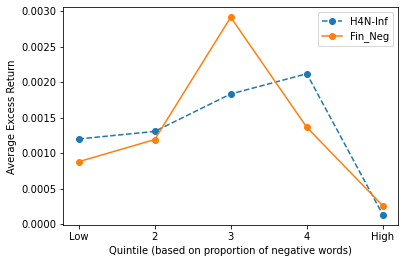

In [31]:
X = ["Low", 2, 3, 4, "High"]
k1 = df3.loc['H4N_ratio',:]
k2 = df3.loc['Fin-Neg_ratio',:]
plt.plot(X,k1,'o--',label="H4N-Inf")
plt.plot(X,k2,'o-',label="Fin_Neg")
plt.xlabel("Quintile (based on proportion of negative words)")
plt.ylabel("Average Excess Return")
plt.legend(loc = "best")
plt.show()